## Stochastic && Mini-batch Gradient Descent

Hàm mất mát J(θ) (θ là tập hợp các tham số của mô hình)

**Thuật toán Gradient Descent:**
1. Dự đoán một điểm khởi tạo: θ = θ*
2. Cập nhật θ đến khi đạt được kết quả chấp nhận được: θ = θ − η*∇J(θ)

**Thuật toán Stochastic Gradient Descent:**
Khi cập nhật θ theo GD, chúng ta sử dụng tất cả các điểm dữ liệu xi. Do 
đó gặp hạn chế đối với cơ sở dữ liệu có vô cùng nhiều điểm.

Trong thuật toán SGD, tại 1 thời điểm, ta chỉ tính đạo hàm của hàm mất mát 
dựa trên chỉ một điểm dữ liệu xi rồi cập nhật θ.
Việc này được thực hiện với từng điểm trên toàn bộ dữ liệu, sau đó lặp lại 
quá trình trên. 

Mỗi lần duyệt một lượt qua tất cả các điểm trên toàn bộ dữ liệu được gọi là 
một epoch. Với GD thông thường thì mỗi epoch ứng với 1 lần cập nhật 
θ, với SGD thì mỗi epoch ứng với N lần cập nhật θ với N là số điểm dữ liệu.

**Lưu ý**: sau mỗi epoch, chúng ta cần shuffle (xáo trộn) thứ tự của các dữ 
liệu để đảm bảo tính ngẫu nhiên.

**Thuật toán Mini-batch Gradient Descent:**
Khác với SGD, mini-batch sử dụng một số lượng n lớn hơn 1 (nhưng vẫn nhỏ hơn tổng số dữ liệu N rất nhiều). Giống với SGD, Mini-batch Gradient Descent bắt đầu mỗi epoch bằng việc xáo trộn ngẫu nhiên dữ liệu rồi chia toàn bộ dữ liệu thành các mini-batch, mỗi mini-batch có n điểm dữ liệu (trừ mini-batch cuối có thể có ít hơn nếu N không chia hết cho n). Mỗi lần cập nhật, thuật toán này lấy ra một mini-batch để tính toán đạo hàm rồi cập nhật. 

## Perceptron && sigmoid

Perceptron là thành phần cơ bản nhất cửa mạng Neural
<img src="images/image1.png">
Kết quả đầu ra là 1 nếu "tổng trọng số đầu vào 入力" lớn hơn hoặc bằng một ngưỡng (threshold) thích hợp và 0 nếu ngược lại.

<img src="images/image2.png">

Perceptron learning algorithm (PLA) là một thuật toán đơn giản giúp tìm một ranh giới siêu phẳng cho bài toán phân lớp nhị phân, với giả sử rằng tồn tại ranh giới phẳng đó. Nếu hai lớp dữ liệu có thể được phân chia hoàn toàn bằng một siêu phẳng, ta nói rằng hai lớp đó linearly separable.
<img src="images/image3.png">

Tuy nhiên chỉ sử dụng 1 perceptron thì không thể được thể hiện tốt cho các vấn đề không thể được phân tách tuyến tính. Chẳng hạn bài toán XOR
<img src="images/image4.png">

## MultiLayer Perceptron

<img src="images/image5.png">

Hàm sgn (còn gọi là hard-threshold) đóng vai trò là một activation function.Dữ liệu đầu vào được đặt vào input layer, lấy tổng có trọng số lưu vào biến z rồi đi qua hàm kích hoạt để có kết quả ở y. Đây chính là một dạng đơn giản nhất của neural network. 

Nếu f(z)=z thì neural network sẽ mô tả linear regression. Trong thực tế, hàm sgn không được sử dụng vì hai lý do: đầu ra là discrete, và đạo hàm tại hầu hết các điểm bằng 0 (trừ điểm 0 không có đạo hàm). Việc đạo hàm bằng 0 này khiến cho các thuật toán gradient-based (ví dụ như Gradient Descent) không hoạt động!

Đối với những bài toán phân lớp nhị phân, đầu ra có thể biểu diễn dưới dạng xác suất thay vì -1 hoặc 1 như là trong PLA. Những bài toán đó được gọi là **logistic regression**. Những yếu tố quan trọng cần có đối với activation funciton trong bài toán này:
    - Là Hàm số liên tục, nhận giá trị bị chặn trong khoảng (0,1)
    - Xét 1 giá trị nằm trong khoảng (0,1) là ngưỡng, những giá trị nằm càng xa ngưỡng về bên trái thì gần 0, và ngược lại, càng xa ngưỡng về bên phải sẽ gần 1. 
    - Có đạo hàm tại mọi điểm, phù hợp cho việc tính đạo hàm để tối ưu.
Hàm sigmoid là hàm số thỏa mãn các yếu tố nói trên.
<img src="images/image6.png">

## Feed forward neural network

<img src="images/image7.png">

Mạng nơ-ron lan truyền xuôi là một mạng trong đó các nơ-ron được sắp xếp theo lớp(Layer) và chỉ được kết nối giữa các lớp liền kề. Feed forward neural network được hiểu là dữ liệu đi theo chiều xuôi từ đầu theo hướng mũi tên và không quay lại, neural network đó sẽ có dạng là acyclic graph - đồ thị không khép kín. 


# ------------------------------------------------------------------------------------------------------------

# ML basic with Keras

Load và xử lý dữ liệu đầu vào

In [19]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

Xây dựng model, bao gồm việc config các layer neural network của model.

Sử dụng Sequential API để tạo ra model Keras đơn giản nhất Sequential - một mạng NN chỉ gồm các layer kết nối tuần tự

Tạo layer Flatten trong model để trải phẳng hình ảnh 28x28 pixel thành mảng 1 chiều 784 phần tử

Layer Dense được sử dụng như một fully connected layer neural network với các tham số: 
1. units: số chiều output
2. activation: chọn activation
3. ...

Cấu trúc Regression MLPs cơ bản
<img src="images/image8.png">

Cấu trúc Classification MLPs cơ bản
<img src="images/image9.png">

<img src="images/image10.png">

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Compile model

Config các tham số :
* Loss function
* Optmizer
* Metrics

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Tiến hành train model 

In [9]:
model.fit(train_images, train_labels, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.4945 - accuracy: 0.8259
Epoch 2/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3697 - accuracy: 0.8680
Epoch 3/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3337 - accuracy: 0.8787
Epoch 4/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.3105 - accuracy: 0.8856
Epoch 5/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2923 - accuracy: 0.8923
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2780 - accuracy: 0.8968
Epoch 7/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2662 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2546 - accuracy: 0.9050
Epoch 9/10
60000/60000 [

Đánh giá độ chính xác của model và sử dụng model

# ------------------------------------------------ ------------------------------------------------

# Text classification

In [11]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
print(tf.__version__)

2.0.0-beta1


Load và tiền xử lý dữ liệu

In [12]:
(train_data, test_data), info = tfds.load(
    # Use the version pre-encoded with an ~8k vocabulary.
    'imdb_reviews/subwords8k', 
    # Return the train/test datasets as a tuple.
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset (instead of a dictionary).
    as_supervised=True,
    # Also return the `info` structure. 
    with_info=True)

In [25]:
encoder = info.features['text'].encoder

In [26]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32, tf.compat.v1.data.get_output_shapes(train_data)))

test_batches = (
    test_data
    .padded_batch(32, tf.compat.v1.data.get_output_shapes(train_data)))

Xây dựng model

Dùng Sequential API với
* Embedding layer: với lượng vocabulary là vocab_size được nhúng vào 1 vector 16 dimensions
* GlobalAveragePooling1D: trả về 1 vector output có độ dài cố định (16 units) bằng tổng trung bình giá trị trên các dimension
* Dense: layer output sử dụng hàm sigmoid để đưa ra đánh giá

In [29]:
model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1, activation='sigmoid')])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


Compile Model

In [30]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Train Model

In [31]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 59s 75ms/step - loss: 0.6844 - accuracy: 0.6152 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 0.6349 - accuracy: 0.7376 - val_loss: 0.6080 - val_accuracy: 0.7865
Epoch 3/10
782/782 [==============================] - 10s 12ms/step - loss: 0.5585 - accuracy: 0.7917 - val_loss: 0.5423 - val_accuracy: 0.8125
Epoch 4/10
782/782 [==============================] - 9s 12ms/step - loss: 0.4904 - accuracy: 0.8294 - val_loss: 0.4880 - val_accuracy: 0.8375
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 0.4354 - accuracy: 0.8555 - val_loss: 0.4447 - val_accuracy: 0.8521
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 0.3921 - accuracy: 0.8722 - val_loss: 0.4109 - val_accuracy: 0.8573
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 0.3584 - accuracy: 0.8820 - val_loss: 0.3846 - val_ac

In [32]:
loss, accuracy = model.evaluate(test_batches)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

    782/Unknown - 15s 20ms/step - loss: 0.3364 - accuracy: 0.8758Loss:  0.33641991754779427
Accuracy:  0.87576


In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

predictions = model.predict(test_images)

predictions[0]

np.argmax(predictions[0])

test_labels[0]

10000/10000 - 0s - loss: 0.3232 - accuracy: 0.8892

Test accuracy: 0.8892


9

# ------------------------------------------------ ------------------------------------------------

# Ex5: Overfit and underfit

## 1. Hiểu về Overfit
Cách đơn giản nhất để biểu diễn overfitting là sử dụng 1 model nhỏ (ít learnable parameters)
Trong deep learning, lượng learnable parameters trong mô hình được gọi là model's "capacity".

Theo trực giác, một mô hình với nhiều parameters hơn thì có "memorization capacity" dễ học được ánh xạ hoàn hảo giữa traning data và nhãn,nhưng lại ko có năng lực khái quát hóa,do đó mà suy luận kém với các dữ liệu unseen
Deep learning models có xu hướng fitting dữ liệu training data, nhưng cái mình cần là generalization, ko phải fitting.

Ngược lại nếu quá ít memorization resources, mạng ko đủ để học ánh xạ. 

Để tìm kích thước mô hình phù hợp, tốt nhất là bắt đầu với tương đối ít lớp và tham số, sau đó bắt đầu tăng kích thước của các lớp hoặc thêm lớp mới cho đến khi thấy validation loss vẫn giảm. (To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin increasing the size of the layers or adding new layers until you see diminishing returns on the validation loss.)


### 2. Learning rate schedule
Nhiều mô hình training tốt hơn nếu giảm dần learning rate trong quá trình train. 

Ví dụ
https://www.tensorflow.org/api_docs/python/tf/compat/v1/train/inverse_time_decay


In [5]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np
import tensorflow as tf

In [11]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500 # sau bao nhiêu điểm dữ liệu thì cập nhật weights
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE # hết 1 epochs (duyệt hết tập training) 

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001, # learning_rate
  decay_steps=STEPS_PER_EPOCH*1000, # step to lower learning_rate
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

**Công thức cập nhật**
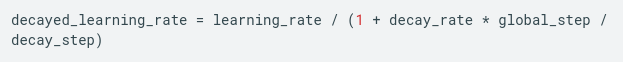

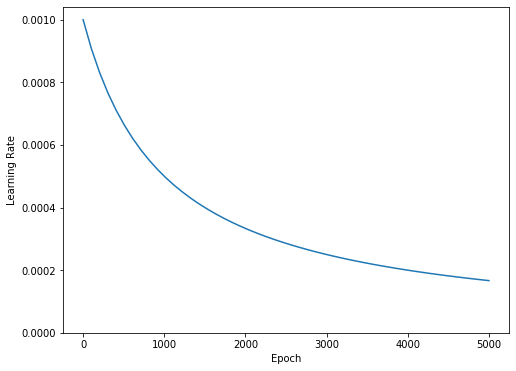

In [12]:
# Gán global_step để demo trên biểu đồ
step = np.linspace(0,100000)
lr = lr_schedule(step)

plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

### 3.Early Stopping
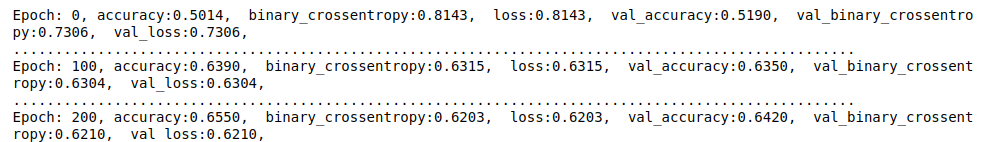

Định nghĩa 1 số cái log ra console trong quá trình train
Dùng `callbacks.TensorBoard` to generate TensorBoard logs for the training.
Gọi các callbacks này khi fit models

Thêm `callbacks.EarlyStopping` để tránh traing quá nhiều lần và ko cái thiện được hiệu suất

In [18]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(), # . mỗi khi kết thúc epochs
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200), 
    # 200 epochs mà ko cải thiện
    tf.keras.callbacks.TensorBoard(logdir/name), # tạo log
  ]

In [14]:
def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
  if optimizer is None:
    optimizer = get_optimizer()
  model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

  model.summary()

  history = model.fit(
    train_ds,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_data=validate_ds,
    callbacks=get_callbacks(name),
    verbose=0)
  return history

### 4. Overfit

Cross-entropy loss, or log loss, tính toán hiệu suất của mô hình phân loại, cho đầu ra là 1 xác suất giá trị từ 0->1 
Cross-entropy loss tăng nếu như xác suất dự đoán lệnh với ground-truth (increases as the predicted probability diverges from the actual label). So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. 

Một model hoàn hảo sẽ có log loss tiệm cận 0.

Log cho các lần training với các mô hình từ đơn giản đến phức tạp
<img src="images/image11.png">

Quan sát, mô hình medium và large có "binary cross entropy" lệnh hoàn toàn so với tập train.
Model fit với tập traing tới mức train_loss giảm về 0.

Hay có thể gọi là hiện tượng overfitting
- Với medium model, overfit xảy ra từ epochs 80 
- Với large model, overfit xảy ra sớm hơn từ epochs 55 

### 5. Ngăn chặn Overfit

####  5.1 Regularization l1, l2 
Kỹ thuật regularization phổ biến nhất là thêm vào hàm mất mát một số hạng nữa. 

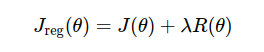
Việc tối ưu hàm mất mát khi đó đồng nghĩa với việc tối thiểu cả loss function và số hạng regularization.
Khi lambda càng lớn, phần regularization càng trở nên quan trọng hơn so với phần loss chính, vì vậy thuật toán sẽ cố gắng làm tối thiểu phần regularization, giúp cho các hệ số w không được quá lớn.

Có 2 biểu thức regularization phổ biến đc thêm vào, ứng với L1 và L2.
- L2 giúp cho các hệ số nhỏ, không được quá lớn. 
- L1 giúp cho hầu hết các hệ số bằng 0.

Lưu ý khi thêm số hạng regularization: λ thường được chọn là một số nhỏ để biểu thức regularization không làm giảm quá nhiều chất lượng của nghiệm.

In [ ]:
l2_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])
# l2(0.001) means that every coefficient in the weight matrix of the layer will 
# add 0.001 * weight_coefficient_value**2 to the total loss of the network.

Với hệ số lamda: 0.001

<img src="images/image12.png">

Với hệ số lamda: 0.002
<img src="images/image13.png">

Với hệ số regularization nhỏ, loss ko bị ảnh hướng quá nặng, train loss giảm xuống nhiều nhưng test thực tế  l2 val lại kém (lamda=0.001). Mô hình vẫn hơi bị overfit.

Với hệ số regularization lamda=0.002 thì train_loss và val_loss tương đồng nhau hơn. 

####  5.2 Add dropout

In [ ]:
from tensorflow.keras import regularizers

combined_model = tf.keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5), # drop 1 nửa số output features của layer
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

regularizer_histories['combined'] = compile_and_fit(combined_model, "regularizers/combined")

Dropout, ứng dụng vào từng layer, consists of randomly "dropping out" (i.e. set to zero) set 1 số output features của layer về 0 trong quá trình training. Xét ví dụ layer trả về [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; Khi áp dụng dropout, vector sẽ có vài mục ngẫu nhiên bị set về 0, chẳng hạn. [0, 0.5, 1.3, 0, 1.1].

(The intuitive explanation for dropout is that because individual nodes in the network cannot rely on the output of the others, each node must output features that are useful on their own.)

<img src="images/image14.png">

Lưu ý khi sử dụng layer dropout: nên lựa chọn hệ số dropout khoảng 0.5, nếu hơn có thể làm giảm hiệu suất mô hình

#### 5.3 Kết hợp Regularizer và Add dropout layer

In [ ]:
combined_model = tf.keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

regularizer_histories['combined'] = compile_and_fit(combined_model, "regularizers/combined")

<img src="images/image15.png">

# Ex6: Save and load models

Có thể lưu checkpoints trong quá trình training

Tạo 1 **tf.keras.callbacks.ModelCheckpoint** callback để lưu weights

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images,test_labels),
          callbacks=[cp_callback])  # Pass callback to training

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.